# Merging Tables With Different Join Types

Take your knowledge of joins to the next level. In this chapter, you’ll work with TMDb movie data as you learn about left, right, and outer joins. You’ll also discover how to merge a table to itself and merge on a DataFrame index.

## Left Join
 A left join returns all rows of data from the left table and only those rows from the right table where key columns match.

![Left Join](https://i.ibb.co/wwNh5VK/Screenshot-2024-12-18-142847.png)


![](https://i.ibb.co/qDLqBcW/Screenshot-2024-12-18-143102.png)

## Movies table
```python
movies = pd.read_csv('tmdb_movies.csv')
```

## Tagline table
```python
taglines = pd.read_csv('tmdb_taglines.csv')
```

## Merge with left join
```python
movies_taglines = movies.merge(taglines, on='id', how='left')
```

To merge these two tables with a left join, we use our merge method similar to what we learned in chapter 1. Here we list the movie table first and merge it to the taglines table on the ID column in both tables. However, notice an additional argument named 'how'. This argument defines how to merge the two tables. In this case, we use 'left' for a left join. The default value for how is 'inner',
The result of the merge shows a table with all of the rows from the movies table and a value for tag line where the ID column matches in both tables. Wherever there isn't a matching ID in the taglines table, a null value is entered for the tag line. Remember that pandas uses NaN to denote missing data.


## Counting missing rows with left join

The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the `movies` table and the `financials` table.

The `movies` and `financials` tables have been loaded for you.

### Instructions 1/3

**Question**

What column is likely the best column to merge the two tables on?

**Possible answers**
- on='budget'

- on='popularity'

- **on='id'**

## Counting missing rows with left join

The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the `movies` table and the `financials` table.

The `movies` and `financials` tables have been loaded for you.

### Instructions 2/3
Merge the `movies` table, as the left table, with the `financials` table using a left join, and save the result to `movies_financials`



In [1]:
import pandas as pd
movies = pd.read_pickle("../data/movies.p")
financials = pd.read_pickle("../data/financials.p")
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


```python
def merge(self,
          right: Any,
          how: Literal["left", "right", "inner", "outer", "cross"] = "inner",
          on: Hashable | Sequence[Hashable] | ExtensionArray | ndarray | Index | Series | None = None,
          left_on: Hashable | Sequence[Hashable] | ExtensionArray | ndarray | Index | Series | None = None,
          right_on: Hashable | Sequence[Hashable] | ExtensionArray | ndarray | Index | Series | None = None,
          left_index: bool = False,
          right_index: bool = False,
          sort: bool = False,
          suffixes: tuple[str | None, str | None] = ("_x", "_y"),
          copy: bool | None = None,
          indicator: str | bool = False,
          validate: Literal["one_to_one", "1:1", "one_to_many", "1:m", "many_to_one", "m:1", "many_to_many", "m:m"] | None = None):
    pass
```

In [2]:
# Merge movies and financials with a left join
movies_financials = movies.merge(financials, on="id", how="left")
movies_financials.head()

,id,title,popularity,release_date,budget,revenue
0,257,Oliver Twist,20.415572,2005-09-23,50000000.0,42093706.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN
2,38365,Grown Ups,38.864027,2010-06-24,80000000.0,271430189.0
3,9672,Infamous,3.680896,2006-11-16,13000000.0,1151330.0
4,12819,Alpha and Omega,12.300789,2010-09-17,20000000.0,39300000.0


## Counting missing rows with left join

The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the `movies` table and the `financials` table.

The `movies` and `financials` tables have been loaded for you.

### Instructions 3/3

* Count the number of rows in `movies_financials` with a null value in the `budget` column.


In [3]:
# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isna().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


## Enriching a dataset

Setting `how='left'` with the `.merge()`method is a useful technique for enriching or enhancing a dataset with additional information from a different table. In this exercise, you will start off with a sample of movie data from the movie series *Toy Story* . Your goal is to enrich this data by adding the marketing tag line for each movie. You will compare the results of a left join versus an inner join.

The `toy_story` DataFrame contains the *Toy Story* movies. The `toy_story` and `taglines` DataFrames have been loaded for you.

### Instructions 1/2

**50 XP**

* Merge `toy_story` and `taglines` on the `id` column with a **left join** , and save the result as `toystory_tag`.

* With `toy_story` as the left table, merge to it `taglines` on the `id` column with an **inner join** , and save as `toystory_tag`.

In [4]:
taglines = pd.read_pickle("../data/taglines.p")
toy_story = pd.read_pickle("../data/toy_story.pkl")

In [5]:

# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on="id", how="left")

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3      59.995   2010-06-16  No toy gets left behind.
1    863  Toy Story 2      73.575   1999-10-30        The toys are back!
2    862    Toy Story      73.640   1995-10-30                       NaN
(3, 5)


In [6]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on="id", how="inner")

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3      59.995   2010-06-16  No toy gets left behind.
1    863  Toy Story 2      73.575   1999-10-30        The toys are back!
(2, 5)


That's fantastic work! If your goal is to enhance or enrich a dataset, then you do not want to lose any of your original data. A left join will do that by returning all of the rows of your left table, while using an inner join may result in lost data if it does not exist in both tables.


# How many rows with a left join?

Select the **true** statement about left joins.

Try running the following code statements:

* `left_table.merge(one_to_one, on='id', how='left').shape`
* `left_table.merge(one_to_many, on='id', how='left').shape`

Note that the `left_table` starts out with **4** rows.

**Possible answers**

- The output of a **one-to-one** merge with a left join will have more rows than the left table.

- The output of a **one-to-one** merge with a left join will have fewer rows than the left table.

- **The output of a *one-to-many* merge with a left join will have greater than or equal rows than the left table.**


```text
A left join will return all of the rows from the left table. If those rows in the left table match multiple rows in the right table, then all of those rows will be returned. Therefore, the returned rows must be equal to if not greater than the left table. Knowing what to expect is useful in troubleshooting any suspicious merges.
```


## Right Joins
![](https://i.ibb.co/9pmR1S7/Screenshot-2024-12-19-160125.png)

It will return all of the rows from the right table and includes only those rows from the left table that have matching values. It is the mirror opposite of the left join.

![](https://i.ibb.co/YR7dPzs/Screenshot-2024-12-19-160646.png)

### Merge with right join

```python
tv_movies = movies.merge(tv_genre, how='right', left_on='id', right_on='movie_id')
```

Additionally, we introduce two new arguments, named left_on and right_on. They allow us to tell the merge which key columns from each table to merge the tables. We list movies as the left table, so we set left_on to id and right_on to movie_id. Our returned table has movies that match our table of tv_genres.

## Outer Join
![](https://i.ibb.co/Z2tw62q/Screenshot-2024-12-19-161558.png)

An outer join will return all of the rows from both tables regardless if there is a match between the tables.

![](https://i.ibb.co/DD5BGhW/Screenshot-2024-12-19-161743.png)


### Merge with outer join
```python
family_comedy = family.merge(comedy, on='movie_id', how='outer',
suffixes=('_fam', '_com'))

```

## Right join to find unique movies

Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called `scifi_movies` and another table of action movies called `action_movies`. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the `movies` table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

The `movies`, `scifi_movies`, and `action_movies` tables have been loaded for you.


### Instructions **1/4**
Merge **action_movies** and **scifi_movies** tables with a right join on **movie_id**. Save the result as **action_scifi**.

In [7]:
action_movies = pd.read_csv("../data/action_movies.csv")
scifi_movies = pd.read_csv("../data/scifi_movies.csv")

In [8]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, how='right', on='movie_id')

action_scifi

,movie_id,genre_x,genre_y
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction
5,335866,NaN,Science Fiction
6,347548,NaN,Science Fiction
7,360188,NaN,Science Fiction
8,367551,NaN,Science Fiction
9,371690,NaN,Science Fiction


### Instructions **2/4**
* Update the merge to add suffixes, where `'_act'` and `'_sci'` are suffixes for the left and right tables, respectively.


In [9]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right', suffixes=('_act', '_sci'))

# Print the first few rows of action_scifi to see the structure
print(action_scifi.head())

   movie_id genre_act        genre_sci
0        11    Action  Science Fiction
1        18    Action  Science Fiction
2        19       NaN  Science Fiction
3        38       NaN  Science Fiction
4        62       NaN  Science Fiction


### Instructions **3/4**
* From `action_scifi`, subset only the rows where the `genre_act` column is null.


In [10]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
# Example of using isnull() to filter rows
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]
scifi_only

,movie_id,genre_act,genre_sci
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction
5,335866,NaN,Science Fiction
6,347548,NaN,Science Fiction
7,360188,NaN,Science Fiction
8,367551,NaN,Science Fiction
9,371690,NaN,Science Fiction


### Instructions **4/4**
* Merge `movies` and `scifi_only` using the `id` column in the left table and the `movie_id` column in the right table with an inner join.


In [11]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right', suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on='id', right_on='movie_id', how='inner')

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

       id                  title  popularity release_date  movie_id genre_act  \
0      62  2001: A Space Odyssey   86.201184   1968-04-10        62       NaN   
1  367551          American Hero    5.023091   2015-12-11    367551       NaN   
2  335866                 Circle    6.752141   2015-10-02    335866       NaN   
3      19             Metropolis   32.351527   1927-01-10        19       NaN   
4  371690              Rotor DR1    0.249561   2015-10-20    371690       NaN   

         genre_sci  
0  Science Fiction  
1  Science Fiction  
2  Science Fiction  
3  Science Fiction  
4  Science Fiction  
(8, 7)


## Popular genres with right join

What are the genres of the most popular movies? To answer this question, you need to merge data from the `movies` and `movie_to_genres` tables. In a table called `pop_movies`, the top 10 most popular movies in the `movies` table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the `movie_to_genres` table using a right join. To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. However, in `pop_movies` that column is called `id`, and in `movie_to_genres` it's called `movie_id`.

The `pop_movies` and `movie_to_genres` tables have been loaded for you.

### Instructions  **100 XP**

* Merge `movie_to_genres` and `pop_movies` using a right join. Save the results as `genres_movies`.
* Group `genres_movies` by `genre` and count the number of `id` values.


In [12]:
pop_movies = pd.read_csv("../data/popular_movies.csv")
movie_to_genres = pd.read_pickle("../data/movie_to_genres.p")
print(pop_movies)
print(movie_to_genres)

       id                                              title  popularity  \
0  211672                                            Minions  875.581305   
1  157336                                       Interstellar  724.247784   
2  293660                                           Deadpool  514.569956   
3  118340                            Guardians of the Galaxy  481.098624   
4   76341                                 Mad Max: Fury Road  434.278564   
5  135397                                     Jurassic World  418.708552   
6      22  Pirates of the Caribbean: The Curse of the Bla...  271.972889   
7  119450                     Dawn of the Planet of the Apes  243.791743   
8  131631              The Hunger Games: Mockingjay - Part 1  206.227151   
9  177572                                         Big Hero 6  203.734590   

  release_date  
0   2015-06-17  
1   2014-11-05  
2   2016-02-09  
3   2014-07-30  
4   2015-05-13  
5   2015-06-09  
6   2003-07-09  
7   2014-06-26  
8   2014-1

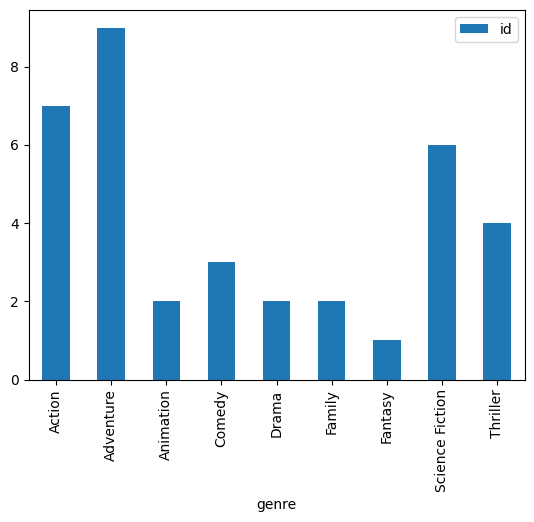

In [13]:
import matplotlib.pyplot as plt
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', left_on='movie_id', right_on='id')
# genres_movies
# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

## Using outer join to select actors

One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: *Iron Man 1* and *Iron Man 2* . Most of the actors played in both movies. Use an outer join to find actors who ***did not*** act in both movies.

The *Iron Man 1* table is called `iron_1_actors`, and *Iron Man 2* table is called `iron_2_actors`. Both tables have been loaded for you and a few rows printed so you can see the structure.

![Venn graph with no overlap](https://assets.datacamp.com/production/repositories/5486/datasets/c5d02ebba511e90ae132f89ff091e6729c040bd2/noJoin.png)

### Instructions    **100 XP**

* Save to `iron_1_and_2` the merge of `iron_1_actors` (left) with `iron_2_actors` tables with an outer join on the `id` column, and set suffixes to `('_1','_2')`.
* Create an index that returns `True` if `name_1` or `name_2` are null, and `False` otherwise.


In [14]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_actors = pd.read_csv("../data/iron_1_actors.csv")
iron_2_actors = pd.read_csv("../data/iron_2_actors.csv")
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     how='outer',
                                     on='id',
                                     suffixes=['_1', '_2'])

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) |
     (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

                   character_1    id        name_1  \
0  Obadiah Stane / Iron Monger  1229  Jeff Bridges   
1                          NaN  1245           NaN   
2                          NaN  2231           NaN   
3                          NaN  2295           NaN   
4                          NaN  6807           NaN   

                                        character_2              name_2  
0                                               NaN                 NaN  
1  Natalie Rushman / Natasha Romanoff / Black Widow  Scarlett Johansson  
2                                Director Nick Fury   Samuel L. Jackson  
3                             Ivan Vanko / Whiplash       Mickey Rourke  
4                                     Justin Hammer        Sam Rockwell  


## **Merging a table to itself**

- referred as `self join`.
- ![Self Join](https://i.ibb.co/XYQ2d75/Screenshot-2024-12-25-194554.png)
- If we would like to see a table with the movies and the corresponding sequel movie in one row of the table, we will need to merge the table to itself. In the left table, the sequel ID for Toy Story of 863 is matched with 863 in the ID column of the right table. Similarly, Toy Story 2 of the left table is matched with Toy Story 3 in the right table. We will talk more about this later, but the merge is an inner join. Therefore, we do not see Avatar and Titanic because they do not have sequels.

```python
original_sequels = sequels.merge(sequels, left_on='sequel', right_on='id', suffixes=('_org','_seq'))
print(original_sequels.head())
```

- **Format Results**
```python
print(original_sequels[, ['title_org', 'title_seq']]).head()
```

- We can join table with different join like `right`, `left`, `outer` and `inner`

```python
original_sequels = sequels.merge(sequels, left_on='sequel', right_on='id', how='left', suffixes=('_org','_seq'))
```

### When to merge at table to itself

- Common situations:
    - Hierarchical relationships
        - e.g: Manager and Employee Relationship
    - Sequential relationships
    - Graph data
        - e.g: Networks of friends


## Self join

Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called `crews`, which has columns `id`, `job`, and `name`. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

The `crews` table has been loaded for you.

### Instructions 1/3

* To a variable called `crews_self_merged`, merge the `crews` table to itself on the `id` column using an inner join, setting the suffixes to `'_dir'` and `'_crew'` for the left and right tables respectively.


In [15]:
crews = pd.read_csv("../data/crews.csv")
crews.head()

,id,job,name
0,19995,Editor,Stephen E. Rivkin
1,19995,Sound Designer,Christopher Boyes
2,19995,Casting,Mali Finn
3,19995,Director,James Cameron
4,19995,Writer,James Cameron


In [16]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, how='inner', on='id', suffixes=('_dir', '_crew'))

crews_self_merged.head()


,id,job_dir,name_dir,job_crew,name_crew
0,19995,Editor,Stephen E. Rivkin,Editor,Stephen E. Rivkin
1,19995,Editor,Stephen E. Rivkin,Sound Designer,Christopher Boyes
2,19995,Editor,Stephen E. Rivkin,Casting,Mali Finn
3,19995,Editor,Stephen E. Rivkin,Director,James Cameron
4,19995,Editor,Stephen E. Rivkin,Writer,James Cameron


### Instructions **2/3**

* Create a Boolean index, named `boolean_filter`, that selects rows from the left table with the *job* of `'Director'` and avoids rows with the *job* of `'Director'` in the right table.


In [17]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))

# Create a Boolean index to select the appropriate
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') &
     (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]
direct_crews

,id,job_dir,name_dir,job_crew,name_crew
156,19995,Director,James Cameron,Editor,Stephen E. Rivkin
157,19995,Director,James Cameron,Sound Designer,Christopher Boyes
158,19995,Director,James Cameron,Casting,Mali Finn
160,19995,Director,James Cameron,Writer,James Cameron
161,19995,Director,James Cameron,Set Designer,Richard F. Mays
...,...,...,...,...,...
2984,72766,Director,Edward Burns,Editor,Janet Gaynor
2992,231617,Director,Scott Smith,Executive Producer,Scott Smith
3000,25975,Director,Brian Herzlinger,Executive Producer,Clark Peterson
3004,25975,Director,Jon Gunn,Executive Producer,Clark Peterson


### Instructions **3/3**
* Use the `.head()` method to print the first few rows of `direct_crews`.

In [18]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))

# Create a boolean index to select the appropriate rows
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') &
                  (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())

        id   job_dir       name_dir        job_crew          name_crew
156  19995  Director  James Cameron          Editor  Stephen E. Rivkin
157  19995  Director  James Cameron  Sound Designer  Christopher Boyes
158  19995  Director  James Cameron         Casting          Mali Finn
160  19995  Director  James Cameron          Writer      James Cameron
161  19995  Director  James Cameron    Set Designer    Richard F. Mays


## Merging on Indexes
There are different methods to set the index of a table, but if our data starts off in a CSV file, we can use the index_col argument of the read_csv method.

```python
movies = pd.read_csv('tmdb_movies.csv', index_col=['id'])
```

### Merging on index
```python
movies_taglines = movies.merge(taglines, on='id', how='left')
print(movies_taglines.head())
```
Our merge statement looks identical to before. However, in this case we are inputting to the 'on' argument the index level name which is called 'id'. The merge method automatically adjusts to accept index names or column names. The returned table looks as before, except the 'id' is the index.


### MultiIndex Datasets

```python
samuel = pd.read_csv('samuel.csv', index_col=['movie_id','cast_id'])
```

![](https://i.ibb.co/dkzL319/Screenshot-2024-12-25-214519.png)

```python
casts = pd.read_csv('casts.csv', index_col=['movie_id','cast_id'])
```

<a href="https://ibb.co/hYPLq8Y"><img src="https://i.ibb.co/wc9Bv6c/Screenshot-2024-12-25-214634.png" alt="Screenshot-2024-12-25-214634" border="0"></a>

Here, we have two tables with a multiIndex that holds the `movie ID` and `cast ID`. The first table, named `'samuel'`, has the `movie` and `cast ID` for a group of movies that Samuel L. Jackson acted in. The second table, named cast, has the movie ID and cast ID for a number of movie characters. Let's merge these two tables on their multiIndex.



### MultiIndex Merge
```python
samuel_casts = samuel.merge(casts, on=['movie_id','cast_id'])
print(samuel_casts.head())
print(samuel_casts.shape)
```
<a href="https://ibb.co/BLGkyhz"><img src="https://i.ibb.co/NxrR90V/Screenshot-2024-12-25-215012.png" alt="Screenshot-2024-12-25-215012" border="0"></a>

In this merge, we pass in a list of index level names to the 'on' argument, just like we did when merging on multiple columns. Since this is an inner join, both the movie_id and cast_id must match in each table to be returned in the result. It's interesting to see that Samuel Jackson has acted in over 65 movies! That's a lot.

###  Index merge with left_on and right_on

- Movies Table
<a href="https://ibb.co/pzyN9HV"><img src="https://i.ibb.co/3NzVLx6/Screenshot-2024-12-25-215732.png" alt="Screenshot-2024-12-25-215732" border="0"></a>

- Genre Table
<a href="https://ibb.co/TqKcGR3"><img src="https://i.ibb.co/zH8sgbv/Screenshot-2024-12-25-215847.png" alt="Screenshot-2024-12-25-215847" border="0"></a><br /><a target='_blank' href='https://dedupelist.com/'></a>

```python
movies_genres = movies.merge(movie_to_genres, left_on='id', left_index=True, right_on='movie_id', right_index=True)
print(movies_genres.head())
```

<a href="https://ibb.co/3d21ThQ"><img src="https://i.ibb.co/nm9rwkt/Screenshot-2024-12-25-220125.png" alt="Screenshot-2024-12-25-220125" border="0"></a><br /><a target='_blank' href='https://usefulwebtool.com/math-keyboard'></a>


## Index merge for movie ratings

To practice merging on indexes, you will merge `movies` and a table called `ratings` that holds info about movie ratings. Ensure that your merge returns **all** rows from the `movies` table, and only matching rows from the `ratings` table.

The `movies` and `ratings` tables have been loaded for you.

### Instructions **100 XP**

* Merge the `movies` and `ratings` tables on the `id` column, keeping all rows from the `movies` table, and save the result as `movies_ratings`.



In [19]:
# Merge to the movies table the ratings table on the index
movies = pd.read_pickle("../data/movies.p")
ratings = pd.read_pickle("../data/ratings.p")
movies_ratings = movies.merge(ratings, on='id')

# Print the first few rows of movies_ratings
print(movies_ratings.head())

      id                 title  popularity release_date  vote_average  \
0    257          Oliver Twist   20.415572   2005-09-23           6.7   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5   
2  38365             Grown Ups   38.864027   2010-06-24           6.0   
3   9672              Infamous    3.680896   2006-11-16           6.4   
4  12819       Alpha and Omega   12.300789   2010-09-17           5.3   

   vote_count  
0       274.0  
1        27.0  
2      1705.0  
3        60.0  
4       124.0  


## Do sequels earn more?

It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the `sequels` and `financials` tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the `sequels` table and not all the rows of `financials` table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

The `sequels` and `financials` tables have been provided.

### Instructions 1/4     **25 XP**

* With the `sequels` table on the left, merge to it the `financials` table on index named `id`, ensuring that all the rows from the `sequels` are returned and some rows from the other table may not be returned, Save the results to `sequels_fin`.


In [20]:
sequels = pd.read_pickle("../data/sequels.p")
financials = pd.read_pickle("../data/financials.p")

sequels_fin = sequels.merge(financials, on='id', how='outer')
sequels_fin

,id,title,sequel,budget,revenue
0,5,Four Rooms,<NA>,4000000.0,4300000.0
1,11,Star Wars,<NA>,11000000.0,775398007.0
2,12,Finding Nemo,<NA>,94000000.0,940335536.0
3,13,Forrest Gump,<NA>,55000000.0,677945399.0
4,14,American Beauty,<NA>,15000000.0,356296601.0
...,...,...,...,...,...
4798,426067,Midnight Cabaret,<NA>,NaN,NaN
4799,426469,Growing Up Smith,<NA>,NaN,NaN
4800,433715,8 Days,<NA>,NaN,NaN
4801,447027,Running Forever,<NA>,NaN,NaN


### Instructions **2/4**
* Merge the `sequels_fin` table to itself with an inner join, where the left and right tables merge on `sequel` and `id` respectively with suffixes equal to `('_org','_seq')`, saving to `orig_seq`.


In [26]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel',
                             right_on='id', right_index=True,
                             suffixes=['_org', '_seq'])

# Add calculation to subtract revenue_org from revenue_seq
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']
orig_seq


,sequel,id_org,title_org,sequel_org,budget_org,revenue_org,id_seq,title_seq,sequel_seq,budget_seq,revenue_seq,diff
1,863,862,Toy Story,863,30000000.0,373554033.0,41439,Saw: The Final Chapter,<NA>,20000000.0,136150434.0,-237403599.0
30,767,675,Harry Potter and the Order of the Phoenix,767,150000000.0,938212738.0,256591,Focus,<NA>,50100000.0,153962963.0,-784249775.0
32,122,121,The Lord of the Rings: The Two Towers,122,79000000.0,926287400.0,49013,Cars 2,<NA>,200000000.0,559852396.0,-366435004.0
44,121,120,The Lord of the Rings: The Fellowship of the Ring,121,93000000.0,871368364.0,585,"Monsters, Inc.",62211,115000000.0,562816256.0,-308552108.0
55,674,673,Harry Potter and the Prisoner of Azkaban,674,130000000.0,789804554.0,395,AVP: Alien vs. Predator,<NA>,70000000.0,171183863.0,-618620691.0
91,58,22,Pirates of the Caribbean: The Curse of the Bla...,58,140000000.0,655011224.0,558,Spider-Man 2,<NA>,200000000.0,783766341.0,128755117.0
134,1892,1891,The Empire Strikes Back,1892,18000000.0,538400000.0,25196,Crazy Heart,<NA>,7000000.0,39462438.0,-498937562.0
154,809,808,Shrek,809,60000000.0,484409218.0,274854,The Last Witch Hunter,<NA>,90000000.0,146936910.0,-337472308.0
161,217,89,Indiana Jones and the Last Crusade,217,48000000.0,474171806.0,85,Raiders of the Lost Ark,<NA>,18000000.0,389925971.0,-84245835.0
168,604,603,The Matrix,604,63000000.0,463517383.0,19912,The Final Destination,<NA>,40000000.0,186167139.0,-277350244.0


### Instructions **3/4**

* Select the `title_org`, `title_seq`, and `diff` columns of `orig_seq` and save this as `titles_diff`.


In [29]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel',
                             right_on='id', right_index=True,
                             suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff
titles_diff = orig_seq[['title_org', 'title_seq', 'diff']]

titles_diff.head()

,title_org,title_seq,diff
1,Toy Story,Saw: The Final Chapter,-237403599.0
30,Harry Potter and the Order of the Phoenix,Focus,-784249775.0
32,The Lord of the Rings: The Two Towers,Cars 2,-366435004.0
44,The Lord of the Rings: The Fellowship of the Ring,"Monsters, Inc.",-308552108.0
55,Harry Potter and the Prisoner of Azkaban,AVP: Alien vs. Predator,-618620691.0


### Instructions **4/4**

* Sort by `titles_diff` by `diff` in descending order and print the first few rows.


In [32]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel',
                             right_on='id', right_index=True,
                             suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values('diff', ascending=False).head())

                                 title_org                 title_seq  \
2929                        Before Sunrise  The Amazing Spider-Man 2   
1256   Star Trek III: The Search for Spock                The Matrix   
293   Indiana Jones and the Temple of Doom              Man of Steel   
1084                                   Saw          Superman Returns   
1334                        The Terminator          Star Trek Beyond   

             diff  
2929  700182027.0  
1256  376517383.0  
293   329845518.0  
1084  287169523.0  
1334  265100616.0  


# ***Done***